In [1]:
import torch
import datasets

from torch.utils.data import Dataset, SubsetRandomSampler

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

device = torch.device("cuda:0")

In [2]:
def train_model(model, train_loader, val_loader, loss, optimizer, num_epochs, lr_scheduler=None):    
    loss_history = []
    train_history = []
    val_history = []
    for epoch in range(num_epochs):
        model.train()
        
        loss_accum = 0
        correct_samples = 0
        total_samples = 0
        for i_step, (x, y) in enumerate(train_loader):
            x_gpu = x.to(device)
            y_gpu = y.to(device)
            prediction = model(x_gpu)    
            loss_value = loss(prediction, y_gpu)
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
            loss_accum += loss_value.item()

        ave_loss = loss_accum / i_step
        val_loss = compute_loss(model, val_loader)
        
        loss_history.append(float(ave_loss))
        val_history.append(float(val_loss))
        
        if lr_scheduler:
            lr_scheduler.step()
        
        print("Average loss: %f, Val loss: %f" % (ave_loss, val_loss))
        
    return loss_history, val_history
        
def compute_loss(model, loader):
    """
    Computes accuracy on the dataset wrapped in a loader
    
    Returns: accuracy as a float value between 0 and 1
    """
    model.eval() # Evaluation mode
    # TODO: Copy implementation from previous assignment
    # Don't forget to move the data to device before running it through the model!
    loss_accum = 0
    for i_step, (x, y) in enumerate(loader):
        x_gpu = x.to(device)
        y_gpu = y.to(device)
        prediction = model(x_gpu)
        loss_value = loss(prediction, y_gpu)
        loss_accum += loss_value.item()

    ave_loss = loss_accum / i_step
    return ave_loss

# Подход без закладывания скоростей

In [2]:
train_folder = 'C:/Users/Николай/Desktop/CernProject/data'

In [3]:
dataset = datasets.CernDataset(train_folder, load_from_npy=True, start_moment=7, end_moment=8)

In [4]:
len(dataset)

838

In [5]:
len(dataset)

838

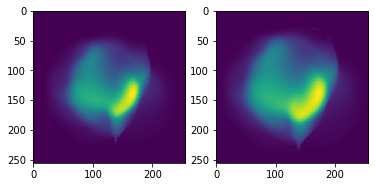

In [6]:
x, y = dataset[0]

fig = plt.figure(figsize=(6,3))

fig.add_subplot(1, 2, 1)
plt.imshow(torch.squeeze(x))
fig.add_subplot(1, 2, 2)
plt.imshow(torch.squeeze(y))

In [7]:
batch_size = 2

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)

In [8]:
def train_model(model, train_loader, val_loader, loss, optimizer, num_epochs, lr_scheduler=None):    
    loss_history = []
    train_history = []
    val_history = []
    for epoch in range(num_epochs):
        model.train()
        
        loss_accum = 0
        correct_samples = 0
        total_samples = 0
        for i_step, (x, y) in enumerate(train_loader):
            x_gpu = x.to(device)
            y_gpu = y.to(device)
            prediction = model(x_gpu)    
            loss_value = loss(prediction, y_gpu)
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
            
            loss_accum += loss_value.item()

        ave_loss = loss_accum / i_step
        val_loss = compute_loss(model, val_loader)
        
        loss_history.append(float(ave_loss))
        val_history.append(float(val_loss))
        
        if lr_scheduler:
            lr_scheduler.step()
        
        print("Average loss: %f, Val loss: %f" % (ave_loss, val_loss))
        
    return loss_history, val_history
        
def compute_loss(model, loader):
    """
    Computes accuracy on the dataset wrapped in a loader
    
    Returns: accuracy as a float value between 0 and 1
    """
    model.eval() # Evaluation mode
    # TODO: Copy implementation from previous assignment
    # Don't forget to move the data to device before running it through the model!
    loss_accum = 0
    for i_step, (x, y) in enumerate(loader):
        x_gpu = x.to(device)
        y_gpu = y.to(device)
        prediction = model(x_gpu)
        loss_value = loss(prediction, y_gpu)
        loss_accum += loss_value.item()

    ave_loss = loss_accum / i_step
    return ave_loss

# 0 -> 1

In [9]:
from model import Unet, UnetEvo, UnetEvoMod
import torch.optim as optim

def unet_loss(output, target):
    loss = 0.5 * torch.sum(torch.abs(output - target)) / torch.sum(torch.abs(target))
    return loss

model = Unet(hidden_size=64)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 100, scheduler)

Average loss: 0.069061, Val loss: 0.021775
Average loss: 0.025667, Val loss: 0.015284
Average loss: 0.021334, Val loss: 0.026726
Average loss: 0.021111, Val loss: 0.011697
Average loss: 0.016207, Val loss: 0.018314
Average loss: 0.009381, Val loss: 0.007455
Average loss: 0.009987, Val loss: 0.007254
Average loss: 0.009191, Val loss: 0.006560
Average loss: 0.008383, Val loss: 0.006477
Average loss: 0.009403, Val loss: 0.012184
Average loss: 0.006156, Val loss: 0.004786
Average loss: 0.005897, Val loss: 0.006043
Average loss: 0.006022, Val loss: 0.006554


KeyboardInterrupt: 

# 7 -> 8

In [9]:
from model import Unet, UnetEvo, UnetEvoMod
import torch.optim as optim

def unet_loss(output, target):
    loss = 0.5 * torch.sum(torch.abs(output - target)) / torch.sum(torch.abs(target))
    return loss

model = Unet(hidden_size=64)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 100, scheduler)

Average loss: 0.101350, Val loss: 0.085186
Average loss: 0.084369, Val loss: 0.085287
Average loss: 0.083210, Val loss: 0.082244
Average loss: 0.079901, Val loss: 0.084778
Average loss: 0.080622, Val loss: 0.086215
Average loss: 0.081632, Val loss: 0.081409
Average loss: 0.078755, Val loss: 0.079724
Average loss: 0.078614, Val loss: 0.080556
Average loss: 0.079330, Val loss: 0.083482
Average loss: 0.077679, Val loss: 0.079377
Average loss: 0.077487, Val loss: 0.079485
Average loss: 0.077842, Val loss: 0.079084
Average loss: 0.076762, Val loss: 0.078661
Average loss: 0.076597, Val loss: 0.078315
Average loss: 0.076346, Val loss: 0.078660
Average loss: 0.075692, Val loss: 0.077641
Average loss: 0.075424, Val loss: 0.077150
Average loss: 0.075230, Val loss: 0.077045
Average loss: 0.074752, Val loss: 0.076604
Average loss: 0.074561, Val loss: 0.076595
Average loss: 0.074236, Val loss: 0.076434
Average loss: 0.074008, Val loss: 0.075937
Average loss: 0.073722, Val loss: 0.075730
Average los

KeyboardInterrupt: 

In [11]:
from torch.utils.data.sampler import Sampler

class SubsetSampler(Sampler):
    def __init__(self, indices):
        self.indices = indices

    def __iter__(self):
        return (self.indices[i] for i in range(len(self.indices)))

    def __len__(self):
        return len(self.indices)

model.eval()
indices = list(range(20))
sampler = SubsetSampler(indices)
loader = torch.utils.data.DataLoader(dataset,
                                     sampler=sampler)

#device=torch.device("cpu")
#model.to(device)
x, y = next(iter(loader))

In [12]:
%%time
prediction = model(x.to(device))

Wall time: 316 ms


torch.Size([1, 1, 256, 256])


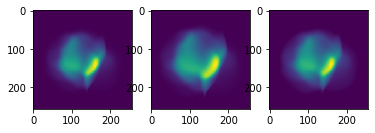

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
  
print(y.shape)
prediction = prediction.detach().cpu()

fig.add_subplot(1, 3, 1)
plt.imshow(torch.squeeze(x))
fig.add_subplot(1, 3, 2)
plt.imshow(torch.squeeze(y))
fig.add_subplot(1, 3, 3)
plt.imshow(torch.squeeze(prediction))
plt.show()

# Закладывание скоростей

In [3]:
train_folder = 'C:/Users/Николай/Desktop/CernProject/data'
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=0, end_moment=1)

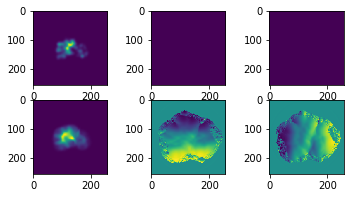

In [4]:
x, y = dataset[0]

fig = plt.figure(figsize=(6,3))

fig.add_subplot(2, 3, 1)
plt.imshow(torch.squeeze(x[0]))
fig.add_subplot(2, 3, 2)
plt.imshow(torch.squeeze(x[1]))
fig.add_subplot(2, 3, 3)
plt.imshow(torch.squeeze(x[2]))

fig.add_subplot(2, 3, 4)
plt.imshow(torch.squeeze(y[0]))
fig.add_subplot(2, 3, 5)
plt.imshow(torch.squeeze(y[1]))
fig.add_subplot(2, 3, 6)
plt.imshow(torch.squeeze(y[2]))

In [5]:
batch_size = 2

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)

In [ ]:
from model import Unet, UnetEvo, UnetEvoMod
import torch.optim as optim

def unet_loss(output, target):
    return 0.5 * torch.sum(torch.sum(torch.abs(output - target), dim=(2,3)) / torch.sum(torch.abs(target), dim=(2,3)))

model = Unet(hidden_size=64, in_channels=3, out_dim=3)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 100, scheduler)

# Предсказание 1 компоненты

In [31]:
train_folder = 'C:/Users/Николай/Desktop/CernProject/data'
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=7, end_moment=8,
                                                predict_type=0)

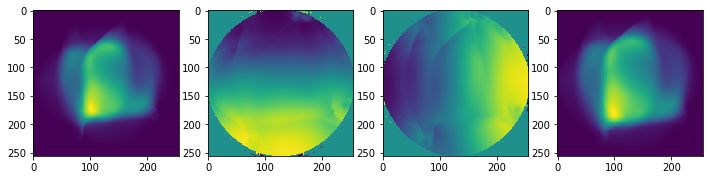

In [32]:
x, y = dataset[9]

fig = plt.figure(figsize=(12,3))

fig.add_subplot(1, 4, 1)
plt.imshow(torch.squeeze(x[0]))
fig.add_subplot(1, 4, 2)
plt.imshow(torch.squeeze(x[1]))
fig.add_subplot(1, 4, 3)
plt.imshow(torch.squeeze(x[2]))

fig.add_subplot(1, 4, 4)
plt.imshow(torch.squeeze(y))

In [35]:
batch_size = 2

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)

In [36]:
from model import Unet, UnetEvo, UnetEvoMod
import torch.optim as optim

# def unet_loss(output, target):
#     return 0.5 * torch.sum(torch.sum(torch.abs(output - target), dim=(2,3)) / torch.sum(torch.abs(target), dim=(2,3)))

def unet_loss(output, target):
    return 0.5 * torch.sum(torch.abs(output - target)) / torch.sum(torch.abs(target))

model = Unet(hidden_size=64, in_channels=3, out_dim=1)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-8)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 100, scheduler)

Average loss: 0.362994, Val loss: 0.288155
Average loss: 0.282719, Val loss: 0.271500
Average loss: 0.272271, Val loss: 0.268084
Average loss: 0.267140, Val loss: 0.269723
Average loss: 0.262182, Val loss: 0.268575
Average loss: 118050.937567, Val loss: 39.005779
Average loss: 8.434948, Val loss: 18.144946
Average loss: 4.043377, Val loss: 4.696643
Average loss: 4.145511, Val loss: 2.752715
Average loss: 3.041086, Val loss: 3.402925
Average loss: 1.389784, Val loss: 1.180129
Average loss: 1.376327, Val loss: 1.807231
Average loss: 1.918396, Val loss: 1.492716
Average loss: 1.771103, Val loss: 0.909346
Average loss: 1.436527, Val loss: 3.338473
Average loss: 0.928458, Val loss: 0.795692
Average loss: 0.814660, Val loss: 0.740420
Average loss: 0.983123, Val loss: 2.072700
Average loss: 1.338785, Val loss: 1.545075
Average loss: 1.008254, Val loss: 0.763120
Average loss: 0.686092, Val loss: 0.677225
Average loss: 0.696695, Val loss: 0.748870
Average loss: 0.788405, Val loss: 1.471824
Aver

KeyboardInterrupt: 

# Предсказание одной компоненты по 3м
$V_x = V_x \cdot E_d$

In [3]:
train_folder = 'C:/Users/Николай/Desktop/CernProject/data'
dataset = datasets.CernDatasetOneStepVelocities(train_folder, start_moment=7, end_moment=8,
                                                predict_type=0, modified_velocities=True)

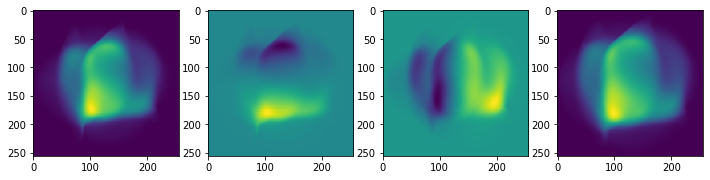

In [4]:
x, y = dataset[9]

fig = plt.figure(figsize=(12,3))

fig.add_subplot(1, 4, 1)
plt.imshow(torch.squeeze(x[0]))
fig.add_subplot(1, 4, 2)
plt.imshow(torch.squeeze(x[1]))
fig.add_subplot(1, 4, 3)
plt.imshow(torch.squeeze(x[2]))

fig.add_subplot(1, 4, 4)
plt.imshow(torch.squeeze(y))

In [5]:
batch_size = 2

data_size = len(dataset)
validation_fraction = .2

val_split = int(np.floor((validation_fraction) * data_size))
indices = list(range(data_size))
np.random.seed(42)
np.random.shuffle(indices)

val_indices, train_indices = indices[:val_split], indices[val_split:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                           sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         sampler=val_sampler)

In [6]:
from model import Unet, UnetEvo, UnetEvoMod
import torch.optim as optim

# def unet_loss(output, target):
#     return 0.5 * torch.sum(torch.sum(torch.abs(output - target), dim=(2,3)) / torch.sum(torch.abs(target), dim=(2,3)))

def unet_loss(output, target):
    return 0.5 * torch.sum(torch.abs(output - target)) / torch.sum(torch.abs(target))

model = Unet(hidden_size=64, in_channels=3, out_dim=1)
device = torch.device("cuda:0")
model.to(device)

loss = unet_loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

loss_history, val_history = train_model(model, train_loader, val_loader, loss, optimizer, 30, scheduler)

Average loss: 0.326914, Val loss: 0.298503
Average loss: 0.278316, Val loss: 0.288808
Average loss: 0.267036, Val loss: 0.278775
Average loss: 0.264075, Val loss: 0.264396
Average loss: 0.265230, Val loss: 0.267139
Average loss: 0.258334, Val loss: 0.260751
Average loss: 0.254293, Val loss: 0.258994
Average loss: 0.255565, Val loss: 0.264489
Average loss: 0.245440, Val loss: 0.252761
Average loss: 0.248460, Val loss: 0.250883
Average loss: 0.241950, Val loss: 0.238746
Average loss: 0.238857, Val loss: 0.245228
Average loss: 0.236095, Val loss: 0.239772
Average loss: 0.235205, Val loss: 0.246618
Average loss: 0.234150, Val loss: 0.245562
Average loss: 0.231502, Val loss: 0.242517
Average loss: 0.233676, Val loss: 0.237949
Average loss: 0.234086, Val loss: 0.244243
Average loss: 0.230729, Val loss: 0.240353
Average loss: 0.234556, Val loss: 0.236735
Average loss: 0.231920, Val loss: 0.232700
Average loss: 0.232738, Val loss: 0.238589
Average loss: 0.231629, Val loss: 0.239810
Average los